#   Verification of parameter hypotheses 

#   Libraries

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.diagnostic import kstest_normal
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import binom_test
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import binom_test, proportions_ztest, proportions_chisquare
from statsmodels.distributions.empirical_distribution import ECDF


# Warmup

  ## Example, Kanji, criterion 1 
  The line for the production of pudding shall ensure the average weight of the pudding in 
  Package 4 grams, declared standard deviation - 1 grams. 
  
  During the inspection, 9 packages are selected and the average weight of the product is 
  4.6 grams. 
  
  $H_0$: The average weight of the pudra in the package is normal. 
  
  $H_1$: The average weight of the pudra in the package is not normal. 

```p=0.0719```

  Let's check the "hand-in-hand" criterion: 
$Z = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}}.$
$p(Z) = 2 \bigl(1-F(|Z|)\bigr).$

In [ ]:
mu = 4
std = 1
n = 9
mean = 4.6


In [ ]:
Z = # your code
Z


In [ ]:
p = # your code
p


  Simplify a similar sample and test the criterion using the library ``statsmodels''' 

In [ ]:
np.random.seed(42)

X = np.random.randn(n) * std + mean
print('mean={}, std={}'.format(np.mean(X), np.std(X)))


In [ ]:
print('Z={}, p={}'.format(*ztest(X, value=mu)))


  # Cobzar, task 227 
  The standard level of defective products in the batch p_0 = $ 0.05$ Out of 20 items 
  
  The inspection found two defective batches. 
  
  $H_0: the percentage of defective products in the lot is no higher than normal. 
  
  $H_1 : the percentage of defective products in the lot is above normal. 
  
  For the binominal criterion ``p=0.2642 `''. 

  Let's check the "hand-in-hand" criterion: 
$T = \sum X_i$
$p(T) = 1 - F(T)$

In [ ]:
n = 20
p0 = 0.05

T = # your code


In [ ]:
p = # your code
p


###   We'll check the criterion using the library ```scipy''''. 

In [ ]:
st.binom_test(T, n, p0, alternative='greater')


###   Check the criterion using the library ``statsmodels''' 

In [ ]:
binom_test(T, n, p0, alternative='larger')


##   Anti-conservability of confidence intervals 

In [5]:
N_exp = 100
n = 40
p_array =  np.arange(0.05, 0.95, 0.01)


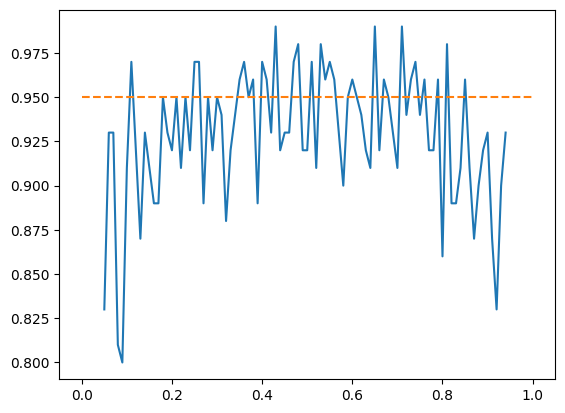

In [6]:
np.random.seed(42)

plot_Y = []
for p in p_array:
    success = 0
    for _ in range(N_exp):
        X = np.random.binomial(n, p)
        left, right = (proportion_confint(X, n))
        if left <= p <= right:
            success += 1.0
    plot_Y.append(success / N_exp)
plt.plot(p_array, plot_Y)
plt.plot([0,1], [0.95, 0.95], ls='--')
plt.show()


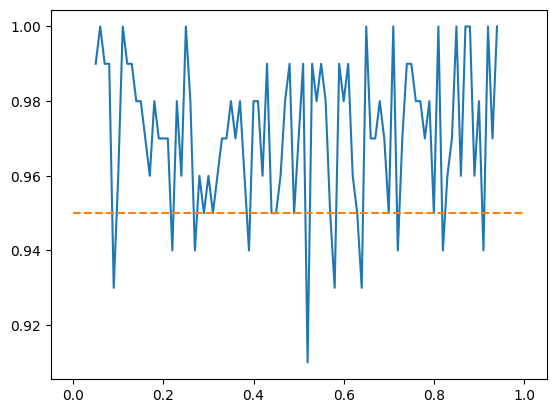

In [7]:
np.random.seed(42)

plot_Y = []
for p in p_array:
    success = 0
    for _ in range(N_exp):
        X = np.random.binomial(n, p)        
        left, right = (proportion_confint(X, n, method='beta'))
        if left <= p <= right:
            success += 1
    plot_Y.append(success / N_exp)
plt.plot(p_array, plot_Y)
plt.plot([0,1], [0.95, 0.95], ls='--')
plt.show()


Task about James Bond, follow-up


Let Bond choose a bloated martini in 12 out of 16 cases. 
Required: 

1.   To test the hypothesis that martini is equivalent by methods ``binom_test'', ``proportions_chisquare'', 
```proportions_ztest```.

2.   Simulate, build a pow relationship to the true p value for 5, 10, 20, 100, 1000 samples for different methods at 0.05 value. 

3.   Simulate, build a first-kind error relationship to the verifiable value of $p_0 at the true value of p=0.5 at the specified n=10 muscle. 

###   Item 1 

In [ ]:
#  your code 


###   Item 2 

In [ ]:
np.random.seed(42)

#  your code 


###   Item 3 

In [ ]:
np.random.seed(42)

#  your code 


  # Mykelson experiment 
**Michelson A.A. Experimental determination of the velocity of light made at the U.S. Naval Academy, Annapolis. Astronomical Papers, 1, 109-145, 1880. **

  Mikelson's experiments are a class of physical experiments that examine the speed of light diffusion relative to direction. 
  Let's check the data from Mikelson's classic test on measuring the speed of light with a rotating mirror, 100 observations of normality. 

In [11]:
speed = pd.read_csv('https://raw.githubusercontent.com/intsystems/psad/master/seminars/sem2/data/speed.txt', header=None).values[:, 0]


##   Distribution hystogram 

In [ ]:
#  your code 


/tmp/ipykernel_43077/50106755.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(speed, hist=False, label='Empirical distribution')


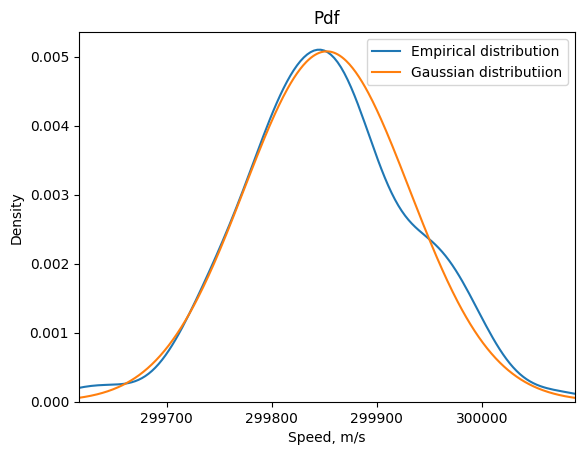

In [12]:
sns.distplot(speed, hist=False, label='Empirical distribution')
x = np.arange(min(speed) - 1000, max(speed) + 1000, 1)
plt.plot(x, st.distributions.norm(np.mean(speed), np.std(speed)).pdf(x), label='Gaussian distributiion')
plt.legend(loc='best')
plt.title('Pdf')
plt.xlabel('Speed, m/s')
plt.ylabel('Density')
plt.xlim(np.mean(speed) - 3 * np.std(speed), np.mean(speed) + 3 * np.std(speed))
plt.show()


/tmp/ipykernel_43077/1858354245.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(speed, hist=False, kde_kws=dict(cumulative=True), label='Empirical distribution')


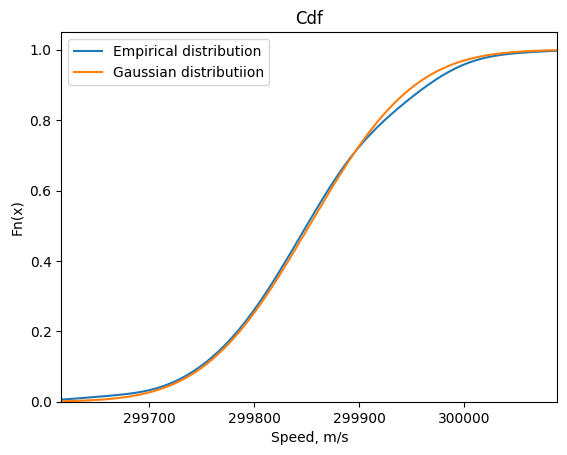

In [13]:
sns.distplot(speed, hist=False, kde_kws=dict(cumulative=True), label='Empirical distribution')
x = np.arange(min(speed) - 1000, max(speed) + 1000, 1)
plt.plot(x, st.distributions.norm(np.mean(speed), np.std(speed)).cdf(x), label='Gaussian distributiion')
plt.legend(loc='best')
plt.title('Cdf')
plt.xlabel('Speed, m/s')
plt.ylabel('Fn(x)')
plt.xlim(np.mean(speed) - 3 * np.std(speed), np.mean(speed) + 3 * np.std(speed))
plt.show()


##   Normality check 

### q-q plot

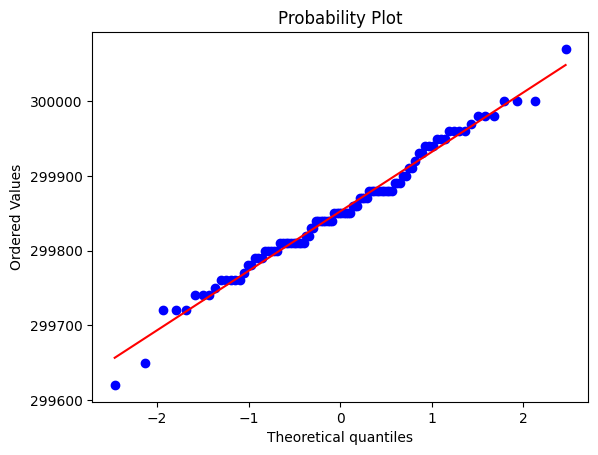

In [14]:
qq_points, qq_line =st.probplot(speed, plot=plt)
plt.show()


###   Kolmogorov criteria (Lillieforsa) 

In [15]:
kstest_normal(speed, dist='norm', pvalmethod='approx')


(0.08342437427409632, 0.08289042847559838)

###   Shapiro-Wilk criterion 

In [16]:
st.shapiro(speed)


ShapiroResult(statistic=0.9880728721618652, pvalue=0.5135963559150696)

###   Jarque-Bera criterion 

In [17]:
st.jarque_bera(speed)


Jarque_beraResult(statistic=0.29492498111997556, pvalue=0.8628948044152577)

#   Legend destroyers: the back of the arm 

  ## Part 1 
  In the fifth season of the 13 series, the legend destroyers tested the fairness of the expression "know something" like the back of one's hand.    Twelve test subjects participated in the experiment.    Each of them was presented with 10 photographs of the same hands of different people, among whom they were to guess their own. 
  Eleven of the 12 subjects chose their photograph. 
  
  
  $H_1$: Test subjects select a photograph of the back of their own hand consciously (p>0.1). 


In [ ]:
n  = 12
T  = 11
p0 = 0.1


###   Precise binominal criterion: 

In [ ]:
#  your code 


### Z-test

In [ ]:
#  your code 


###   Wilson's confidence interval 

In [ ]:
proportion_confint(T, n, method='wilson')


###   Wald &apos; s criterion 

In [ ]:
p_mle = # code
D_mle = # code
zw = # code
st.distributions.norm.logcdf(zw)


  Expected response: ``~ 4.641*10(21) ```' 

  ### Part 2 
  A similar experiment was conducted with photographs of the palms.  
  
  Seven of the 12 subjects guessed their picture. 
  
  $H_1$: Test subjects select a photograph of their own palm consciously (p>0.1). 

In [ ]:
n  = 12
T2  = 7
p0 = 0.1



In [ ]:
binom_test(T2, n, p0, 'larger')


  Is it possible to say that people know the back of their hands better than they know their hands?    Let's compare the results of the experiments. 
  Because these are the same test subjects, the samples are connected. 
  But there's no information on connectivity, so we have to use criteria for independent samples.    Z criteria: 

In [ ]:
#  your code 


  Expected response: ``~0.03''' 

# Rats
**Weindruch R., Walford R.L. The Retardation of Aging and Disease by Dietary Restriction. Springfield: Charles C. Thomas, 1988. **

In [21]:
rats = pd.read_csv('https://raw.githubusercontent.com/intsystems/psad/master/seminars/sem2/data/rats.txt', delimiter='\t')
rats.head()


,lifespan,diet
0,105,restricted
1,193,restricted
2,211,restricted
3,236,restricted
4,302,restricted


In [22]:
x1 = rats.loc[rats['diet'] == 'restricted']['lifespan'].values
x2 = rats.loc[rats['diet'] == 'ad libitum']['lifespan'].values


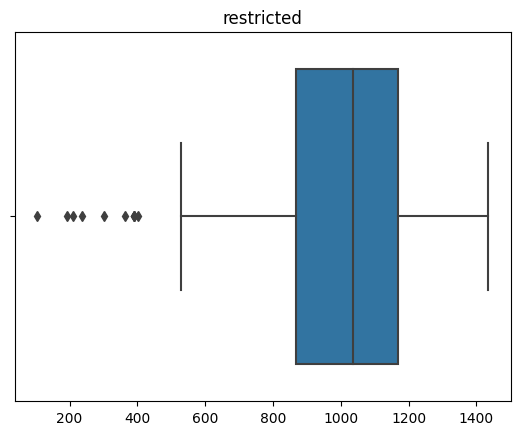

In [23]:
plt.title('restricted')
sns.boxplot(x=x1)
plt.show()


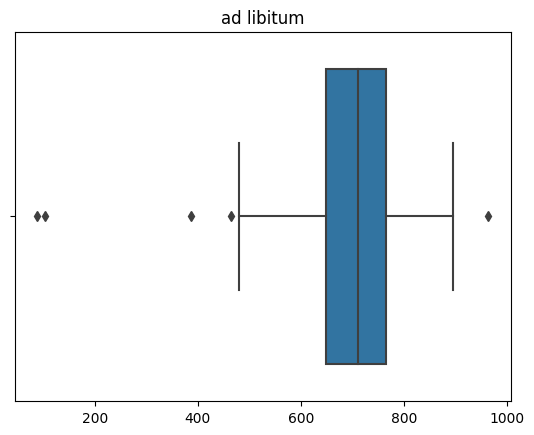

In [24]:
plt.title('ad libitum')
sns.boxplot(x=x2)
plt.show()


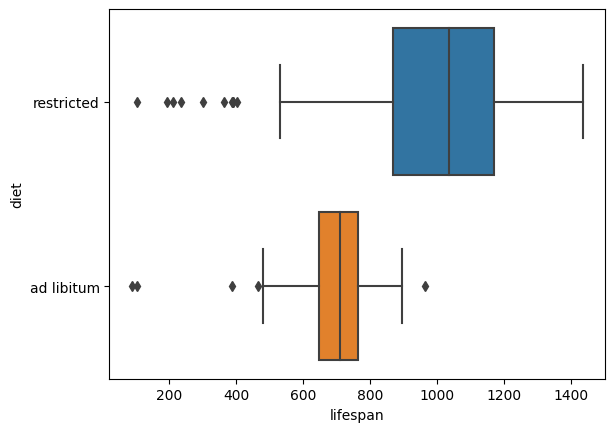

In [25]:
sns.boxplot(x='lifespan', y='diet', data=rats)
plt.show()


##   Distribution histograms 

In [ ]:
#  your code 


  ## Normality check 
  $H_0: Each sample is normal 
  
  $H_1: no 

### Shapiro

In [ ]:
#  your code 


### q-q plot

In [ ]:
#  your code 


In [ ]:
#  your code 


  Let's try to exclude rats who have lived less than 400 days (for example, it can be assumed that death before that time is due to reasons unrelated to diet). 

In [ ]:
x1c = x1[np.where(x1>=400)[0]]
x2c = x2[np.where(x2>=400)[0]]


### Shapiro

In [ ]:
#  your code 


  Expected p-value: 
```0.049,  0.119```
  Accumulated samples can be considered almost normal. 

  * * Comparison of averages 
  
  $H_0$: The life expectancy of rats does not change when the diet is restricted. 
  
  $H_1$: Rats on a strict diet live longer. 


###   Abbreviated samples 

In [ ]:
ttest_ind(x1c, x2c, alternative='larger', usevar='unequal')


In [ ]:
ttest_ind(x1c,x2c, alternative='two-sided', usevar='unequal')


###   Full sample: 

In [ ]:
ttest_ind(x1,x2, alternative='larger', usevar='unequal')


In [ ]:
ttest_ind(x1,x2, alternative='two-sided', usevar='unequal')


# Placebo
**Pearson D.A, Santos C.W., Casat C.D., et al. (2004). Treatment effects of methylphenidate on cognitive functioning in children with mental retardation and ADHD. Journal of the American Academy of Child and Adolescent Psychiatry, 43(6), 677–685. **

  Metalphenidate and attention deficit syndrome 
  
  Twenty-four mentally retarded children received either methylphenylate or placebo during the week, and at the end of the week were tested for the ability to suppress impulsive behavioral reactions.    In the second stage, the placebo and the drug changed, after a week's course, each tester passed a second test. 
  
  What's the effect of the drug? 

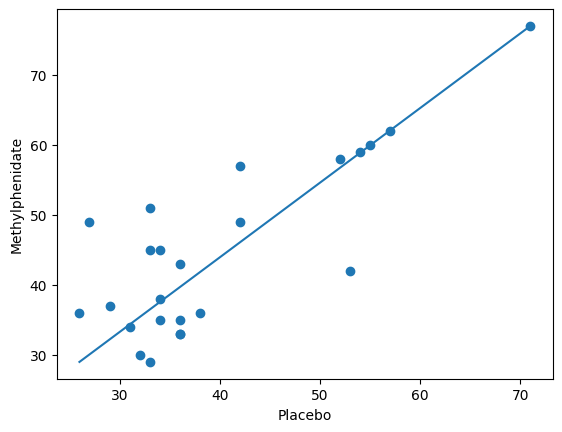

In [26]:
att = pd.read_csv('https://raw.githubusercontent.com/intsystems/psad/master/seminars/sem2/data/ADHD.txt', sep=' ').values

plt.scatter(att[:, 0], att[:, 1])
plt.xlabel('Placebo')
plt.ylabel('Methylphenidate')
plt.plot([min(att[:,0]), max(att[:,0])], [min(att[:,1]), max(att[:,1])])

plt.show()


  Checking the hypotheses 
  
  To use the Student criterion for related samples, see if there are any significant deviations from the normality of pairs: 

###   Normality check 

/tmp/ipykernel_43077/1169417257.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(deltas, label='Deltas empirical distribution')


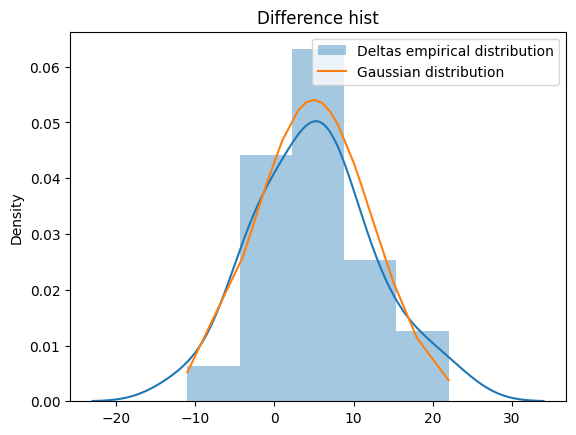

In [27]:
deltas = att[:,1] - att[:,0]
sns.distplot(deltas, label='Deltas empirical distribution')
plt.plot(sorted(deltas), st.distributions.norm(np.mean(deltas), np.std(deltas)).pdf(sorted(deltas)), label='Gaussian distribution')
plt.legend(loc='best')
plt.title('Difference hist')

plt.show()


#### q-q plot

In [ ]:
#  your code 


#### Shapiro

In [ ]:
#  your code 


  Therefore, the Studiant's criterion is applicable. 

   Student's criterion 
   
  $H_0$ - no effect (mat expectations are equal) 
  
  $H_1$ -- there's an effect. 

In [28]:
st.ttest_rel(att[:,0], att[:,1])


Ttest_relResult(statistic=-3.222362445123041, pvalue=0.003771488176381471)

  If we didn't have information on the relationship between the samples, we'd have to apply the Studiant's version for independent samples: 


ShapiroResult(statistic=0.8574870824813843, pvalue=0.003020160598680377)


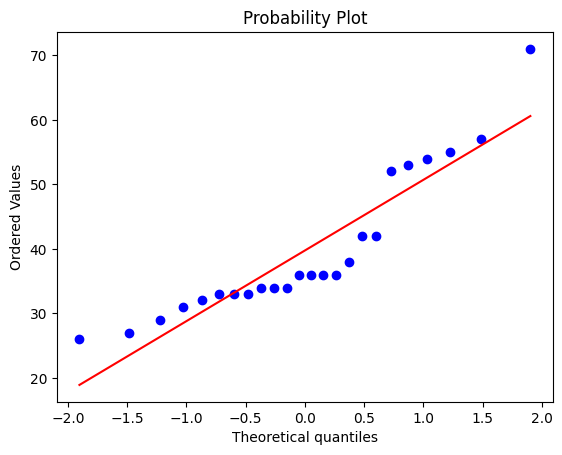

In [29]:
print(st.shapiro(att[:,0]))
_ = st.probplot(att[:,0], plot=plt)
plt.show()


ShapiroResult(statistic=0.9164453744888306, pvalue=0.04876827448606491)


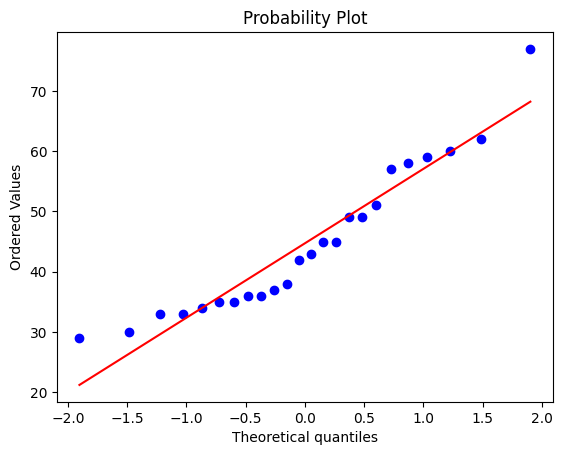

In [30]:
print(st.shapiro(att[:,1]))
_ = st.probplot(att[:,1], plot=plt)
plt.show()


In [31]:
st.ttest_ind(att[:,0], att[:,1])


Ttest_indResult(statistic=-1.452163501815909, pvalue=0.1532433046938409)